In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [16]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [32]:
value = np.quantile(df.reviews_per_month,0)
print(value)
df.reviews_per_month.median()

nan


0.72

In [33]:
df.reviews_per_month.fillna(df.reviews_per_month.median())

0        0.21
1        0.38
2        0.72
3        4.64
4        0.10
5        0.59
6        0.40
7        3.47
8        0.99
9        1.33
10       0.43
11       1.50
12       1.34
13       0.91
14       0.22
15       1.20
16       1.72
17       2.12
18       4.44
19       0.72
20       0.07
21       1.09
22       0.37
23       0.61
24       0.73
25       1.37
26       0.72
27       0.49
28       1.11
29       0.24
         ... 
48865    0.72
48866    0.72
48867    0.72
48868    0.72
48869    0.72
48870    0.72
48871    0.72
48872    0.72
48873    0.72
48874    0.72
48875    0.72
48876    0.72
48877    0.72
48878    0.72
48879    0.72
48880    0.72
48881    0.72
48882    0.72
48883    0.72
48884    0.72
48885    0.72
48886    0.72
48887    0.72
48888    0.72
48889    0.72
48890    0.72
48891    0.72
48892    0.72
48893    0.72
48894    0.72
Name: reviews_per_month, Length: 48895, dtype: float64

In [35]:
df.describe(percentiles = [0.33,0.99])

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
33%,1.303772e+07,1.304243e+07,40.702490,-73.974350,80.000000,2.000000,2.000000,0.300000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
99%,3.623888e+07,2.677118e+08,40.864661,-73.776920,799.000000,45.000000,214.000000,7.195800,232.000000,365.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


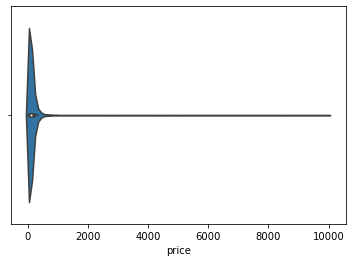

In [49]:
# Task : remove the outliers of column "price"
sns.violinplot(df.price)

plt.show()


In [71]:
df.price.quantile(0.992)

850.0

In [77]:
df_new = df[df.price < df.price.quantile(q=0.8)]
df_new.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.911000e+04,3.911000e+04,39110.000000,39110.000000,39110.000000,39110.000000,39110.000000,31925.000000,39110.000000,39110.000000
mean,1.876184e+07,6.573900e+07,40.727547,-73.947076,98.063309,6.743211,25.032703,1.397090,4.328433,105.567451
std,1.080526e+07,7.649743e+07,0.057398,0.047125,44.444714,20.112339,46.724256,1.724227,19.547067,128.694138
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.445382e+06,7.859552e+06,40.687270,-73.977358,60.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.934838e+07,3.091863e+07,40.719040,-73.951525,90.000000,2.000000,6.000000,0.720000,1.000000,35.000000
75%,2.843770e+07,1.037242e+08,40.764120,-73.929632,130.000000,5.000000,26.000000,2.070000,2.000000,201.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,199.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


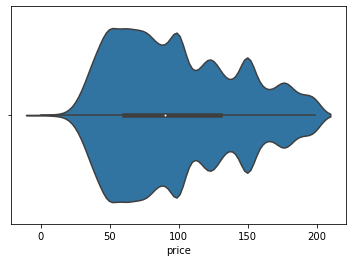

In [78]:
sns.violinplot(df_new.price)
plt.show()